In [1]:
import pandas as pd

In [2]:
# Wczytanie pliku z danymi

tb_ori = pd.read_csv('../Original Data/original_tb.csv')

tb_ori

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [105]:
# Przygotowanie danych do analizy 

tb_copy = tb_ori.copy()

columns_names = tb_copy.filter(regex='new_sp').columns
columns_names

df = pd.melt(tb_ori, id_vars=["iso2","year"], value_name="cases", var_name="sex_and_age")

tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})")    

tmp_df.columns = ["sex", "age_lower", "age_upper"]

tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

df = pd.concat([df, tmp_df], axis=1)

df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()
df = df.sort_values(by=["iso2", "year", "sex", "age"],ascending=True)
df.head(10)

# Zapisanie przygotowanych danych do folderu Analysis Data
df.to_csv(r'..\Analysis Data\converted_data.cvs')
df

,iso2,year,cases,sex,age
75003,AD,1996,0.0,f,0-14
80772,AD,1996,1.0,f,15-24
86541,AD,1996,1.0,f,25-34
92310,AD,1996,0.0,f,35-44
98079,AD,1996,0.0,f,45-54
...,...,...,...,...,...
28844,ZW,2008,614.0,m,15-24
34613,ZW,2008,0.0,m,25-34
40382,ZW,2008,3316.0,m,35-44
46151,ZW,2008,704.0,m,45-54


In [99]:
# Wybieram dwa kraje dla których przygotuje wizualizację danych
# W tym przypadku będzie to Polska i Ukraina
data_from_Ukraine_2008_f = df[(df["iso2"] == 'UA') & (df["year"] == 2008) & (df["sex"] == 'f')] 
data_from_Ukraine_2008_m = df[(df["iso2"] == 'UA') & (df["year"] == 2008) & (df["sex"] == 'm')] 

In [68]:
data_from_Poland_2008_f = df[(df["iso2"] == 'PL') & (df["year"] == 2008) & (df["sex"] == 'f')] 
data_from_Poland_2008_m = df[(df["iso2"] == 'PL') & (df["year"] == 2008) & (df["sex"] == 'm')] 

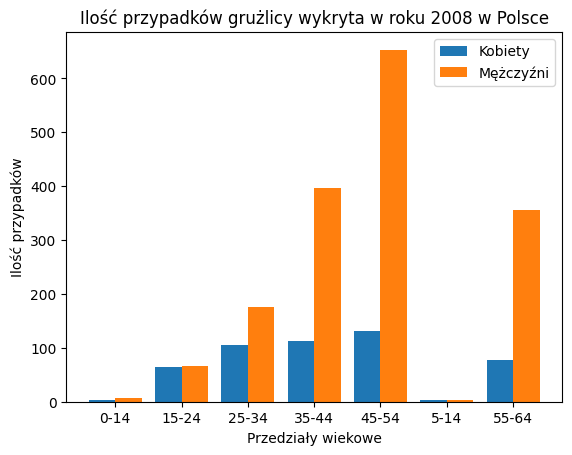

In [102]:
import matplotlib.pyplot as plt
import numpy as np
  
x_axis = np.arange(len(data_from_Poland_2008_f))
plt.bar(x_axis -0.2, data_from_Poland_2008_f['cases'], width=0.4, label = 'Kobiety')
plt.bar(x_axis +0.2, data_from_Poland_2008_m['cases'], width=0.4, label = 'Mężczyźni')
plt.title('Ilość przypadków grużlicy wykryta w roku 2008 w Polsce')
plt.xticks(x_axis, list(data_from_Poland_2008_f['age']))
plt.xlabel('Przedziały wiekowe')
plt.ylabel('Ilość przypadków')  
plt.legend()
plt.show()

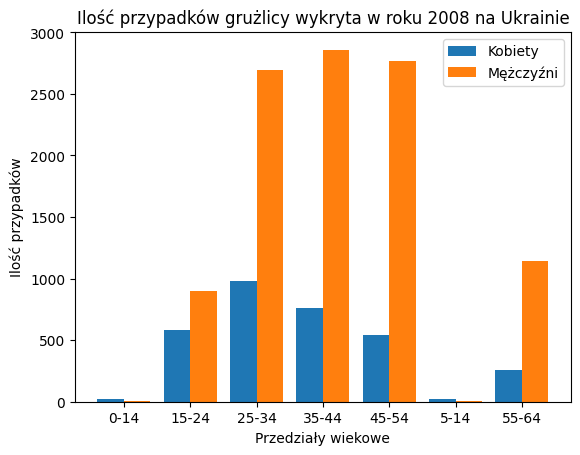

In [103]:
x_axis = np.arange(len(data_from_Poland_2008_f))
plt.bar(x_axis -0.2, data_from_Ukraine_2008_f['cases'], width=0.4, label = 'Kobiety')
plt.bar(x_axis +0.2, data_from_Ukraine_2008_m['cases'], width=0.4, label = 'Mężczyźni')
plt.title('Ilość przypadków grużlicy wykryta w roku 2008 na Ukrainie')
plt.xticks(x_axis, list(data_from_Poland_2008_f['age']))  
plt.xlabel('Przedziały wiekowe')
plt.ylabel('Ilość przypadków')  
plt.legend()
plt.show()